<a href="https://colab.research.google.com/github/ragul-n/Time-Use-survey-India-Analysis/blob/master/How_Students_spend_their_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#(32, 34), (34, 36),
colspecs= [(0, 32),  (36,39), (40,42),(42,45), (45,50),(50,55),(55,56), (56,57), (57,58), (58,61),(61,62),(62,64)  ]

fwf=  pd.read_fwf("/content/drive/MyDrive/Dataset/TIME USE SURVEY/Original Data (.txt)/TUS106_L05.txt",colspecs=colspecs, low_memmory=True, header=None)

In [ ]:
fwf.columns=["Common_ID","Serial_no_of_member","age", "srl__No_of_activity","time_from", "time_to", 
             "whether_performed_multiple_activ","whether_simultaneous_activity", "whether_a_major_activity",
            "_3_didit_activity_code",  "where_the_activity_was_performed", "unpaid_paid_status_of_activity" ]

In [ ]:
level2 = pd.read_stata("/content/drive/MyDrive/Dataset/TIME USE SURVEY/Processed Data in Stata Format(.dta)/TUS106_L02.dta")
level2["state"] = [i[0:2] for i in level2["NSS_Region"]]
level2["Person_serial_no_"]=level2["Person_serial_no_"].astype("float")
level2["Age"]=level2.Age.astype("int32")

level1 = pd.read_stata("/content/drive/MyDrive/Dataset/TIME USE SURVEY/Processed Data in Stata Format(.dta)/TUS106_L01.dta")


In [ ]:
individual_data = level2[["Common_ID","Person_serial_no_" ,"state","Sector", "Gender","usual_principal_activity__status", "industry_of_work__2_digit_of_NIC", "weight_level2"]]

students_list= individual_data[individual_data["usual_principal_activity__status"]=="91"]

students_activity= fwf.merge(students_list, right_on=["Common_ID","Person_serial_no_"], left_on=["Common_ID","Serial_no_of_member" ], how="right")




In [ ]:
students_activity["time_spent"]=pd.to_datetime(students_activity.time_to, format="%H:%M") - pd.to_datetime(students_activity.time_from, format="%H:%M")

students_activity["time_spent"]= students_activity["time_spent"].dt.seconds/60


Time Spent in learning outside of school/collage

In [ ]:
learning_time= students_activity[(students_activity["_3_didit_activity_code"]==620) &  (students_activity["age"]<=25) & (students_activity["age"]>=13) & (students_activity["whether_a_major_activity"]==1)]

learning_time= learning_time.groupby(["state","Sector","Gender", "Common_ID","Serial_no_of_member"])["time_spent", "weight_level2"].agg({"time_spent":"sum","weight_level2":"mean" })

learning_time = learning_time.groupby(["state","Sector","Gender"])[["time_spent", "weight_level2"]].apply(lambda gp: np.average(gp.time_spent, weights=gp.weight_level2))

learning_time.groupby(["Gender"]).agg("mean")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Gender
1    159.131826
2    161.923344
3    188.412232
dtype: float64

Time spent in household chores

In [ ]:

chores_time= students_activity[(students_activity["_3_didit_activity_code"]>=300) & (students_activity["_3_didit_activity_code"]<=399) &
                               (students_activity["age"]<=25) & (students_activity["age"]>=13)]

chores_time.loc[chores_time.whether_a_major_activity==1]

chores_time= chores_time.groupby(["state","Sector","Gender","Common_ID","Serial_no_of_member"])["time_spent", "weight_level2"].agg({"time_spent":"sum","weight_level2":"mean" })

chores_time = chores_time.groupby(["state","Sector","Gender"])[["time_spent", "weight_level2"]].apply(lambda gp: np.average(gp.time_spent, weights=gp.weight_level2))

chores_time = chores_time.groupby(["Gender"]).agg("mean")

chores_time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Gender
1    115.334128
2    161.193553
3    141.818182
dtype: float64

Social Time

In [ ]:
social_time= students_activity[(students_activity["_3_didit_activity_code"]>=700) & (students_activity["_3_didit_activity_code"]<=799) &
                               (students_activity["age"]<=25) & (students_activity["age"]>=13)]

social_time.loc[social_time.whether_a_major_activity==1]

social_time= social_time.groupby(["state","Sector","Gender","Common_ID","Serial_no_of_member"])["time_spent", "weight_level2"].agg({"time_spent":"sum","weight_level2":"mean" })

social_time = social_time.groupby(["state","Sector","Gender"])[["time_spent", "weight_level2"]].apply(lambda gp: np.average(gp.time_spent, weights=gp.weight_level2))

social_time = social_time.groupby([ "Gender"]).agg("mean")

social_time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Gender
1    189.709944
2    184.556898
3    310.753152
dtype: float64

### Leisure Time

In [ ]:
leisure_time= students_activity[(students_activity["_3_didit_activity_code"]>=800) & (students_activity["_3_didit_activity_code"]<=899) &
                               (students_activity["age"]<=25) & (students_activity["age"]>=13)]

leisure_time.loc[leisure_time.whether_a_major_activity==1]

leisure_time= leisure_time.groupby(["state","Sector","Gender","Common_ID","Serial_no_of_member"])["time_spent", "weight_level2"].agg({"time_spent":"sum","weight_level2":"mean" })

leisure_time = leisure_time.groupby(["state","Sector","Gender"])[["time_spent", "weight_level2"]].apply(lambda gp: np.average(gp.time_spent, weights=gp.weight_level2))

leisure_time = leisure_time.groupby(["Gender"]).agg("mean")

leisure_time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Gender
1    244.934721
2    202.056388
3    169.244161
dtype: float64

Time spent in household chores

In [ ]:
selfcare_time= students_activity[(students_activity["_3_didit_activity_code"]>=900) & (students_activity["_3_didit_activity_code"]<=999) &
                               (students_activity["age"]<=25) & (students_activity["age"]>=13)]

selfcare_time.loc[selfcare_time.whether_a_major_activity==1]

selfcare_time= selfcare_time.groupby(["state","Sector","Gender","Common_ID","Serial_no_of_member"])["time_spent", "weight_level2"].agg({"time_spent":"sum","weight_level2":"mean" })

selfcare_time = selfcare_time.groupby(["state","Sector","Gender"])[["time_spent", "weight_level2"]].apply(lambda gp: np.average(gp.time_spent, weights=gp.weight_level2))

selfcare_time = selfcare_time.groupby(["Gender"]).agg("mean")

selfcare_time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Gender
1    779.627021
2    780.698718
3    761.556140
dtype: float64

### What are the top household activities students enage in?

In [ ]:
chores_time= students_activity[(students_activity["_3_didit_activity_code"]>=700) & (students_activity["_3_didit_activity_code"]<=799) &
                               (students_activity["age"]<=25) & (students_activity["age"]>=13)]

chores_time = chores_time.groupby(["Gender","_3_didit_activity_code","Common_ID","Serial_no_of_member"])["time_spent"].agg("sum")

chores_time= chores_time.groupby(["Gender","_3_didit_activity_code"]).agg("mean")

chores_time

Gender  _3_didit_activity_code
1       711.0                     146.386459
        712.0                     116.073654
        713.0                      79.886105
        719.0                     113.621053
        721.0                     177.473684
        722.0                     214.752475
        723.0                     162.857143
        729.0                     132.941176
        730.0                     145.714286
        741.0                      56.573324
        742.0                     114.292929
        749.0                     108.043478
        750.0                     115.077399
        790.0                     104.147727
2       711.0                     147.735742
        712.0                      99.355383
        713.0                      98.068182
        719.0                      99.208401
        721.0                     144.107143
        722.0                     243.275862
        723.0                     167.333333
        729.0           

In [ ]:
t=chores_time.reset_index()
male=t[t["Gender"]=='1'].sort_values("time_spent", ascending=False).set_index("_3_didit_activity_code")
female=t[t["Gender"]=='2'].sort_values("time_spent", ascending=False).set_index("_3_didit_activity_code")

x=female["time_spent"]/male["time_spent"]
x.sort_values(ascending=False)

_3_didit_activity_code
713.0    1.227600
722.0    1.132820
723.0    1.027485
711.0    1.009217
742.0    1.006724
750.0    0.992390
729.0    0.980769
741.0    0.976945
790.0    0.966285
719.0    0.873152
712.0    0.855968
721.0    0.811992
749.0    0.797591
730.0    0.583333
Name: time_spent, dtype: float64

### Relationship between Age and Time Spent in Household Chores

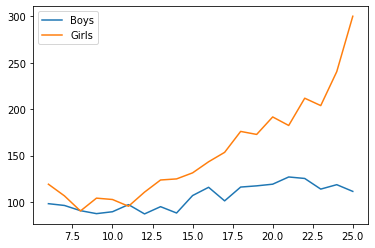

In [ ]:

chores_time= students_activity[(students_activity["_3_didit_activity_code"]>=300) & (students_activity["_3_didit_activity_code"]<=499) & (students_activity["age"]<=25)]

chores_time= chores_time.groupby(["state","Sector","Gender","age", "Common_ID","Serial_no_of_member"])["time_spent", "weight_level2"].agg({"time_spent":"sum","weight_level2":"mean" })

chores_time = chores_time.groupby(["state","Sector","Gender","age"])[["time_spent", "weight_level2"]].apply(lambda gp: np.average(gp.time_spent, weights=gp.weight_level2))

chore_times = chores_time.groupby(["age", "Gender"]).agg("mean")

data= chore_times.reset_index()
data["age"]=data.age.astype("int32")
data["Gender"]=data.Gender.astype("int32")


plt.plot(data[data["Gender"]==1]["age"],data[data["Gender"]==1][0], label="Boys")
plt.plot(data[data["Gender"]==2]["age"],data[data["Gender"]==2][0], label="Girls")
plt.legend()
plt.title("")
